In [2]:
import os
import glob

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import sklearn as sl

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score, classification_report, accuracy_score, confusion_matrix
from sklearn.metrics import r2_score, mean_squared_error
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn import neighbors
from sklearn.model_selection import cross_val_score
from sklearn import linear_model

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import BaggingClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import AdaBoostRegressor

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


%matplotlib inline
import scipy as sc
import math as ma
from scipy import linalg, optimize, constants, interpolate, special, stats
from math import exp, pow, sqrt, log

import seaborn as sns #spezielle Graphikdarstellungen
import statsmodels.api as sm
import statsmodels.stats.api as sms

#import theano 
import tensorflow as tf
from tensorflow import keras

from keras.models import Sequential
from keras.layers import InputLayer,Dense, Activation
from keras.optimizers import SGD #Stochastic Gradient Descent
from keras.utils import to_categorical  
from keras.utils import plot_model

2024-12-20 13:03:54.420098: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-12-20 13:03:54.426888: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-20 13:03:54.486707: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-20 13:03:54.538440: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1734696234.584296    3864 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1734696234.59

In [2]:
data18 = pd.read_csv("csvData/Station_18.csv")
noNa18 = data18.dropna(subset=['T_obs'])
noNa18['Bias'] = noNa18['T_obs'] - data18['T_mod']
noNa18['Date'] = pd.to_datetime(noNa18[['Year', 'Month', 'Day']])
noNa18.head()

/tmp/ipykernel_5026/3172424897.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  noNa18['Bias'] = noNa18['T_obs'] - data18['T_mod']
/tmp/ipykernel_5026/3172424897.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  noNa18['Date'] = pd.to_datetime(noNa18[['Year', 'Month', 'Day']])


,Year,Month,Day,T_obs,T_mod,P_obs,P_mod,H_obs,H_mod,W_obs,W_mod,SW_obs,SW_mod,Bias,Date
365,2002,1,1,-6.00,-6.61,NaN,0.00,76.74,71.18,NaN,1.31,NaN,74.31,0.61,2002-01-01
366,2002,1,2,-3.12,-3.93,NaN,3.49,65.96,71.58,NaN,1.96,NaN,73.24,0.81,2002-01-02
367,2002,1,3,-5.94,-9.48,NaN,0.18,81.46,79.10,NaN,1.09,NaN,73.10,3.54,2002-01-03
368,2002,1,4,-12.24,-10.23,NaN,0.00,83.71,70.42,NaN,1.84,NaN,61.30,-2.01,2002-01-04
369,2002,1,5,-9.64,-7.30,NaN,0.00,79.96,58.86,NaN,1.05,NaN,46.30,-2.34,2002-01-05


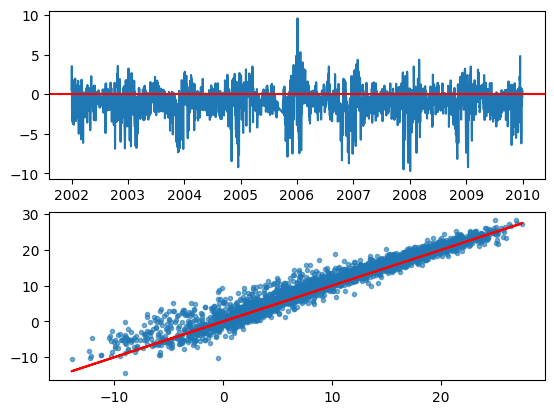

In [3]:
plt.subplot(2, 1, 1)
plt.plot(noNa18['Date'], noNa18['Bias'])
plt.axhline( y = 0, color = 'r', linestyle = '-')
plt.subplot(2, 1, 2)
plt.scatter(noNa18['T_obs'], noNa18['T_mod'], alpha=0.6, marker=".")
plt.plot(noNa18['T_obs'], noNa18['T_obs'], "r-")

In [32]:
# Verzeichnis mit den CSV-Dateien
path = 'csvData/'  # Verzeichnis mit den Dateien
all_files = glob.glob(path + "*.csv")

# Laden der ersten Datei und Festlegen der Spaltennamen
first_file = all_files[0]
df_reference = pd.read_csv(first_file)
column_names = df_reference.columns  # Spaltennamen der ersten Datei

# Laden aller Dateien, Angleichung der Spaltennamen und Hinzufügen des Dateinamens
list_of_dataframes = []

for file in all_files:
    df = pd.read_csv(file)
    
    # Angleichung der Spaltennamen
    df = df.reindex(columns=column_names)
    
    # Hinzufügen des Dateinamens als neue Spalte
    df['source_file'] = file.split("/")[-1]  # Nur der Dateiname, ohne Pfad
    list_of_dataframes.append(df)

# Alle DataFrames zusammenführen
combined_data = pd.concat(list_of_dataframes, ignore_index=True)

# Überprüfung
print(combined_data.head())
combined_data.to_csv('combinedData.csv', index=False)


     Year  Month  Day  T_obs  T_mod  P_obs  P_mod  H_obs  H_mod  W_obs  W_mod  \
0  2001.0      1    1    NaN  -3.14    NaN   0.00    NaN  36.09    NaN   2.63   
1  2001.0      1    2    NaN   0.32    NaN   0.01    NaN  83.65    NaN   2.30   
2  2001.0      1    3    NaN  -2.79    NaN   5.45    NaN  93.97    NaN   2.74   
3  2001.0      1    4    NaN  -0.68    NaN   2.81    NaN  73.67    NaN   3.52   
4  2001.0      1    5    NaN   0.44    NaN   0.73    NaN  68.03    NaN   4.12   

   SW_obs  SW_mod     source_file  
0     NaN   79.77  Station_10.csv  
1     NaN   71.76  Station_10.csv  
2     NaN   62.69  Station_10.csv  
3     NaN   76.39  Station_10.csv  
4     NaN   76.06  Station_10.csv  


In [13]:
combined_data.to_csv('combinedData.csv', index=False)

In [4]:

noNaCom = combined_data.dropna(subset=['T_obs'])

noNaCom['Bias'] = noNaCom['T_obs'] - noNaCom['T_mod']
noNaCom['Date'] = pd.to_datetime(noNaCom[['Year', 'Month', 'Day']])



/tmp/ipykernel_3864/1739391056.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  noNaCom['Bias'] = noNaCom['T_obs'] - noNaCom['T_mod']
/tmp/ipykernel_3864/1739391056.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  noNaCom['Date'] = pd.to_datetime(noNaCom[['Year', 'Month', 'Day']])


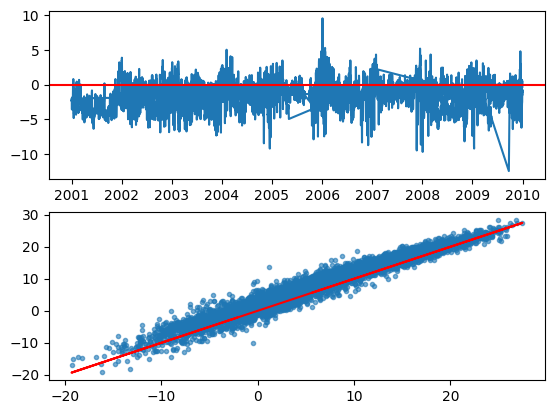

In [5]:
plt.subplot(2, 1, 1)
plt.plot(noNaCom['Date'], noNaCom['Bias'])
plt.axhline( y = 0, color = 'r', linestyle = '-')
plt.subplot(2, 1, 2)
plt.scatter(noNaCom['T_obs'], noNaCom['T_mod'], alpha=0.6, marker=".")
plt.plot(noNaCom['T_obs'], noNaCom['T_obs'], "r-")

In [7]:
#Regressionsmodell
inPolCom = combined_data.iloc[:, 3:13]
inPolCom.head()

#Nas mit mittelwert befüllen

inPolCom.fillna(inPolCom.median(), inplace=True)
inPolCom.head()



,T_obs,T_mod,P_obs,P_mod,H_obs,H_mod,W_obs,W_mod,SW_obs,SW_mod
0,6.03,-3.14,0.4,0.00,79.34,36.09,3.1,2.63,94.745,79.77
1,6.03,0.32,0.4,0.01,79.34,83.65,3.1,2.30,94.745,71.76
2,6.03,-2.79,0.4,5.45,79.34,93.97,3.1,2.74,94.745,62.69
3,6.03,-0.68,0.4,2.81,79.34,73.67,3.1,3.52,94.745,76.39
4,6.03,0.44,0.4,0.73,79.34,68.03,3.1,4.12,94.745,76.06


In [8]:
# Zielvariable: Bias
inPolCom['Bias'] = inPolCom['T_obs'] - inPolCom['T_mod']

# Eingabemerkmale (Features)
features = ['T_mod', 'P_mod', 'H_mod', 'W_mod', 'SW_mod']  # Beispielhafte Features
X = inPolCom[features]

# Zielvariable
y = inPolCom['Bias']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
# Modell initialisieren
model = LinearRegression()

# Training des Modells
model.fit(X_train, y_train)

# Vorhersagen
y_pred = model.predict(X_test)

# Modellbewertung
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R²-Score: {r2:.4f}")


Mean Absolute Error (MAE): 0.6425
Mean Squared Error (MSE): 3.7094
R²-Score: 0.3872


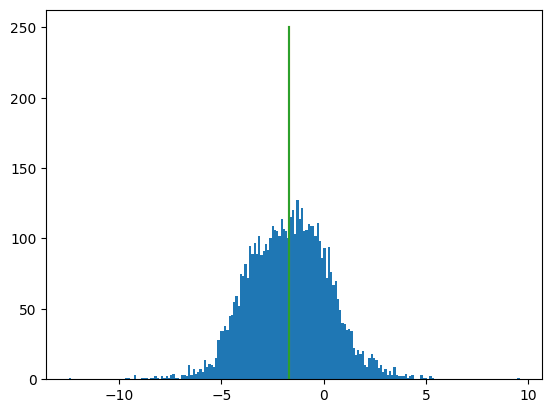

In [18]:
plt.hist(noNaCom.loc[:, 'Bias'], bins=200)
plt.plot([noNaCom.loc[:, 'Bias'].mean(), noNaCom.loc[:, 'Bias'].mean()], [0,250])
plt.plot([noNaCom.loc[:, 'Bias'].median(), noNaCom.loc[:, 'Bias'].median()], [0,250])

/tmp/ipykernel_3864/2180720185.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Bias'] = df_cleaned['T_obs'] - df_cleaned['T_mod']


(array([  1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   1.,   1.,   0.,   0.,   3.,   0.,   0.,   1.,
          1.,   1.,   0.,   1.,   1.,   2.,   1.,   0.,   2.,   1.,   2.,
          1.,   3.,   4.,   1.,   1.,   0.,   3.,   3.,   2.,  10.,   3.,
          7.,   4.,   5.,   7.,   5.,  14.,   9.,  11.,  10.,   9.,  15.,
         28.,  34.,  34.,  38.,  35.,  45.,  46.,  55.,  59.,  52.,  75.,
         73.,  82.,  72.,  95.,  89.,  97.,  89., 102.,  88.,  91.,  96.,
         92., 100., 109., 106., 105., 102., 114., 107., 105., 100., 115.,
        120., 103., 127., 114., 122., 105., 106., 110., 109., 109., 102.,
        111.,  98.,  86.,  93.,  72.,  94.,  76.,  67.,  70.,  57.,  49.,
         40.,  39.,  35.,  36.,  34.,  22.,  17.,  21.,  18.,  20.,  10.,
          9.,  15.,  18.,  15.,  14.,   8.,  10.,   5.,   7.,   3.,   6.,
          3.,   9.,   3.,   2.,   2., 

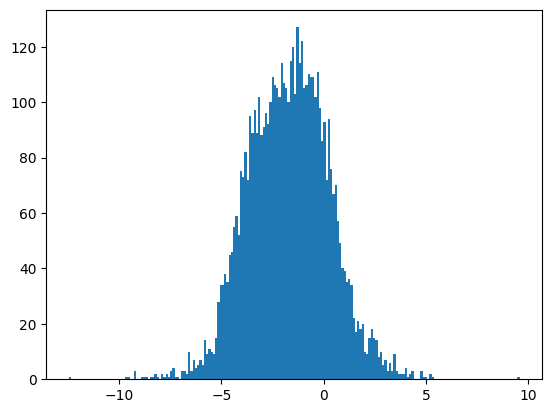

In [38]:
df_cleaned = combined_data.dropna(subset=['T_obs'])
df_cleaned.head()
df_cleaned['Bias'] = df_cleaned['T_obs'] - df_cleaned['T_mod']
plt.hist(df_cleaned.loc[:, 'Bias'], bins=200)

Kolmogorov-Smirnov-Test (KS-Test)
The test shows wether two dates share the same distribution

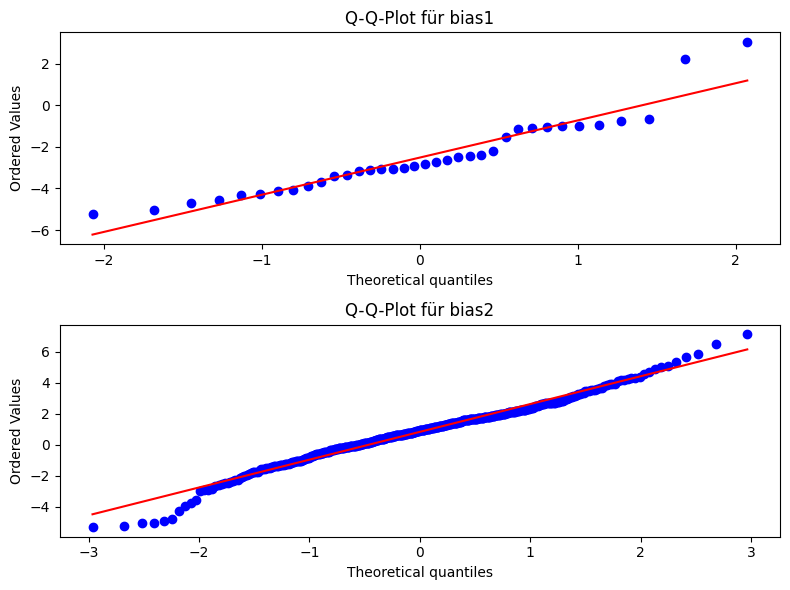

In [72]:
dat1 = pd.read_csv('csvData/Station_10.csv')
dat2 = pd.read_csv('csvData/Station_20.csv')

bias1 = dat1.loc[:, 'T_obs'] - dat1.loc[:, 'T_mod']
bias2 = dat2.loc[:, 'T obs'] - dat2.loc[:, 'T mod']

bias1 = bias1.dropna()
bias2 = bias2.dropna()

# Plot anzeigen
fig, axs = plt.subplots(2, 1, figsize=(8, 6))

# Erster Q-Q-Plot
stats.probplot(bias1, dist="norm", plot=axs[0])
axs[0].set_title('Q-Q-Plot für bias1')

# Zweiter Q-Q-Plot
stats.probplot(bias2, dist="norm", plot=axs[1])
axs[1].set_title('Q-Q-Plot für bias2')

# Sorgt dafür, dass die Subplots keinen Überlapp haben
plt.tight_layout()

# Zeige die Plots an
plt.show()



In [73]:
seasons = ['Spring', 'Summer', 'Fall', 'Winter']
label_season = lambda m : seasons[((m +9) % 12) // 3]